In [68]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [69]:
#Step 1: Download first 20000 training images from database
mnist = fetch_openml('mnist_784', version=1) 
dataset = mnist["data"]
dataset = dataset[:2000]

In [70]:
print(dataset.shape)

(2000, 784)


In [71]:
#Step 2: Center Data
# center our data by subtracting the mean from our data
def center_data(matrix):
    centered = matrix - matrix.mean(axis=0)
    return centered

centered_data = center_data(dataset)

In [72]:
#Step 3: compute the covariance matrix of centered matrix # center our data by subtracting the mean from our data

cov_matrix = np.dot(centered_data.T, centered_data)/len(centered_data)

In [73]:
#Step 4: Compute Eigenvalue decomposition of covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

#sort from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [74]:
#Step 5: Project data into 2 & 3 dimensional space
two_d_matrix = []
three_d_matrix = []
for i in range(3):
    if i < 2:
        two_d_matrix.append(eig_pairs[i][1])
    three_d_matrix.append(eig_pairs[i][1])
    

two_d_matrix = np.array(two_d_matrix)
three_d_matrix = np.array(three_d_matrix)

In [75]:
print("Eigenvalues for 2-D space:", eig_pairs[0][0], ",", eig_pairs[1][0])
print("Eigenvalues for 3-D space:", eig_pairs[0][0], ",", eig_pairs[1][0], ",", eig_pairs[2][0])

print("\n2-D space variance:", (eig_pairs[0][0]+eig_pairs[1][0])/sum(eig_vals))
print("3-D space variance:", (eig_pairs[0][0]+eig_pairs[1][0]+eig_pairs[2][0])/sum(eig_vals))

Eigenvalues for 2-D space: 338999.0506439717 , 252673.2210849566
Eigenvalues for 3-D space: 338999.0506439717 , 252673.2210849566 , 218909.6206779829

2-D space variance: (0.17470154993273246+0j)
3-D space variance: (0.2393384306097289+0j)


In [76]:
Y = mnist["target"]
Y = Y[:2000]

In [77]:
two_d_projections = two_d_projections.real
two_d_coordinates = np.vstack((two_d_projections, Y)).T
print(two_d_coordinates.shape)
dataframe = pd.DataFrame(data=two_d_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

(2000, 3)
  1st_principal 2nd_principal label
0      -187.107       337.295     5
1       -1085.6        440.66     0
2       85.2131      -452.559     4
3       916.237       650.877     1
4       315.564      -690.962     9


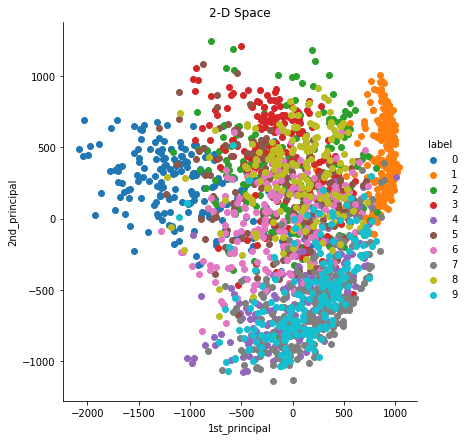

In [78]:
seaborn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.title("2-D Space")
plt.show()

In [79]:
three_d_projections = three_d_projections.real
three_d_coordinates = np.vstack((three_d_projections, Y)).T
dataframe = pd.DataFrame(data=three_d_coordinates, columns=("1st_principal", "2nd_principal", "3rd_principal", "label"))
print(dataframe.head())

  1st_principal 2nd_principal 3rd_principal label
0      -187.107       337.295      -169.097     5
1       -1085.6        440.66       201.549     0
2       85.2131      -452.559      -185.614     4
3       916.237       650.877       66.3987     1
4       315.564      -690.962       79.0038     9


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0.5, 0, '3rd Principal Component')

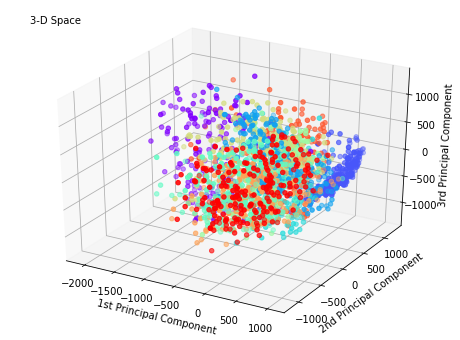

In [82]:
#plotting in 3d
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]
#lists for each class
a1 = [[] for i in range(10)]
b1 = [[] for i in range(10)]
c1 = [[] for i in range(10)]

# append all predictions to their class
for i in range(len(three_d_projections[0])):
    a1[int(dataframe["label"][i])].append(three_d_projections[0][i])
    b1[int(dataframe["label"][i])].append(three_d_projections[1][i])
    c1[int(dataframe["label"][i])].append(three_d_projections[2][i])


for i in range(10):
    ax.scatter3D(a1[i], b1[i], c1[i], c=colors[i], marker='o')
ax.text2D(0.05, 0.95, "3-D Space", transform=ax.transAxes)
ax.set_xlabel('1st Principal Component')
ax.set_ylabel('2nd Principal Component')
ax.set_zlabel('3rd Principal Component')